<a href="https://colab.research.google.com/github/LindsClar/Capstone_2/blob/main/Copy_of_Capstone_Two_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# Organize your data to streamline the next steps of your capstone
#GOAL compare TX market to CA
#load imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
from pathlib import Path
from datetime import date
from pandas.tseries.offsets import MonthEnd

In [112]:
#DATA COLLECTION: load data ie. read_csv()
df = pd.read_csv('USRealEstateTrends.csv')
# see a sample of the data
df.head()

#Need a more clear view of the data provided
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 232 entries, RegionID to 2024-05-CutRaw
dtypes: float64(228), int64(2), object(2)
memory usage: 1.6+ MB


In [113]:
#DATA DEFINITION
#renaming the columns in df
#Should I rename all the columns? Should I eliminate more columns or how can I combine thme by year?
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)
df.head()


,RegionID,SizeRank,Location,State,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [114]:
#Clean
#Now that we've seen the data. I would like to clean it to make it more visually appealing

#dropping NaN
df.dropna(inplace=True)
df.head()

#Locating a outlier or unique values. We will locate the outlier by using .describe() this will show outliers in the
#standard deviation
#Calculate summary statistics for each of your columns
#Visually I would like the data to display cleaninly to the average individual .round(2)
print(round(df.describe(), 2))

#Looking through all the data there's are specific columns that are neccesary
# decided not to drop the column to see the Region ID and Size Ranking to suee further changes

#decided to work with only rounded data
df = df.round(2)
df.head()

#missing values with .isna()
print(df.isna().sum())

#data shows no missing values located


        RegionID  SizeRank  2018-02-HomeValue  2018-02-DaysPending  \
count     122.00    122.00             122.00               122.00   
mean   403624.55    164.70          237485.11                56.44   
std     55845.68    132.77          131427.42                16.72   
min    394308.00      1.00           83849.23                21.00   
25%    394505.00     64.25          156408.65                44.25   
50%    394845.50    133.50          204431.36                55.50   
75%    395054.50    222.50          261289.14                68.00   
max    753920.00    569.00          915915.83                94.00   

       2018-02-CutRaw  2018-03-HomeValue  2018-03-DaysPending  2018-03-CutRaw  \
count          122.00             122.00               122.00          122.00   
mean          8248.47          238974.29                53.38         8636.31   
std           5534.12          132589.89                19.53         5450.25   
min           4900.00           84676.01     

In [115]:
# need to only find outliers for the numerical columns
numeric_df = df.select_dtypes(include=[float, int])

#identifying outlier
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


outlier_lower = (numeric_df<(Q1 - 1.5 * IQR)).sum()
outlier_upper = (numeric_df> (Q3 + 1.5 * IQR)).sum()
outlier = outlier_lower + outlier_upper

print('Number of outliers per column: ', outlier)
print('Max number of Outliers: ', outlier.max())
print('Min number of Outliers: ', outlier.min())


Number of outliers per column:  RegionID                3
SizeRank                5
2018-02-HomeValue      13
2018-02-DaysPending     0
2018-02-CutRaw          6
                       ..
2024-04-DaysPending     3
2024-04-CutRaw         29
2024-05-HomeValue      12
2024-05-DaysPending     4
2024-05-CutRaw         30
Length: 230, dtype: int64
Max number of Outliers:  50
Min number of Outliers:  0


In [116]:
#combining some columns for home value of 2018 - 2024 per the Year
# This is to show not only the changes monthly but year in the housing market
home_value_2018_columns = ['2018-02-HomeValue', '2018-03-HomeValue', '2018-04-HomeValue', '2018-05-HomeValue', '2018-06-HomeValue']
# VETO: home_value_2018_columns = [col for col in df.columns if '2018' in col and 'HomeValue' in col]
df['2018_Avg_HomeValue'] = df[home_value_2018_columns].mean(axis=1)
print(df['2018_Avg_HomeValue'].head())

#Home value 2019
home_value_2019_columns = [col for col in df.columns if '2019' in col and 'HomeValue' in col]
df['2019_Avg_HomeValue'] = df[home_value_2019_columns].mean(axis=1)
print(df['2019_Avg_HomeValue'].head())

#home value 2020
home_value_2020_columns = [col for col in df.columns if '2020' in col and 'HomeValue' in col]
df['2020_Avg_HomeValue'] = df[home_value_2020_columns].mean(axis=1)
print(df['2020_Avg_HomeValue'].head())

#home value 2021
home_value_2021_columns = [col for col in df.columns if '2021' in col and 'HomeValue' in col]
df['2021_Avg_HomeValue'] = df[home_value_2021_columns].mean(axis=1)
print(df['2021_Avg_HomeValue'].head())

#home value 2022
home_value_2022_columns = [col for col in df.columns if '2022' in col and 'HomeValue' in col]
df['2022_Avg_HomeValue'] = df[home_value_2022_columns].mean(axis=1)
print(df['2022_Avg_HomeValue'].head())

#home value 2023
home_value_2023_columns = [col for col in df.columns if '2023' in col and 'HomeValue' in col]
df['2023_Avg_HomeValue'] = df[home_value_2023_columns].mean(axis=1)
print(df['2023_Avg_HomeValue'].head())


#combining some columns for home value of 2024
home_value_2024_columns = [col for col in df.columns if '2024' in col and 'HomeValue' in col]
df['2024_Avg_HomeValue'] = df[home_value_2024_columns].mean(axis=1)
print(df['2024_Avg_HomeValue'].head())



1    472336.488
2    641491.328
3    232147.948
4    244866.334
5    210290.130
Name: 2018_Avg_HomeValue, dtype: float64
1    493703.442500
2    670832.065833
3    238499.800000
4    255806.306667
5    220790.683333
Name: 2019_Avg_HomeValue, dtype: float64
1    510503.394167
2    705473.398333
3    245218.625833
4    267105.087500
5    229447.323333
Name: 2020_Avg_HomeValue, dtype: float64
1    558494.011667
2    803625.421667
3    271020.480000
4    309454.416667
5    259088.847500
Name: 2021_Avg_HomeValue, dtype: float64
1    605107.420833
2    911665.534167
3    295174.864167
4    375357.844167
5    303599.206667
Name: 2022_Avg_HomeValue, dtype: float64
1    618857.930833
2    910421.688333
3    303700.087500
4    377438.510000
5    307201.978333
Name: 2023_Avg_HomeValue, dtype: float64
1    646913.834
2    956406.926
3    317207.468
4    379826.570
5    309183.636
Name: 2024_Avg_HomeValue, dtype: float64


In [117]:
#DATA ORGANIZATION - Adding this to github

    RegionID  SizeRank           Location State  2018-02-HomeValue  \
2     753899         2    Los Angeles, CA    CA           629019.0   
12    395057        12  San Francisco, CA    CA           915916.0   
17    395056        17      San Diego, CA    CA           586463.0   
62    394357        63    Bakersfield, CA    CA           212532.0   
70    394952        71         Oxnard, CA    CA           603756.0   

    2018-02-DaysPending  2018-02-CutRaw  2018-03-HomeValue  \
2                  33.0         20000.0           636850.0   
12                 21.0         39000.0           925973.0   
17                 33.0         15000.0           588610.0   
62                 51.0          7000.0           213905.0   
70                 34.0         11000.0           606108.0   

    2018-03-DaysPending  2018-03-CutRaw  ...  2024-05-HomeValue  \
2                  31.0         20000.0  ...           962388.0   
12                 19.0         45112.0  ...          1183272.0   
17   

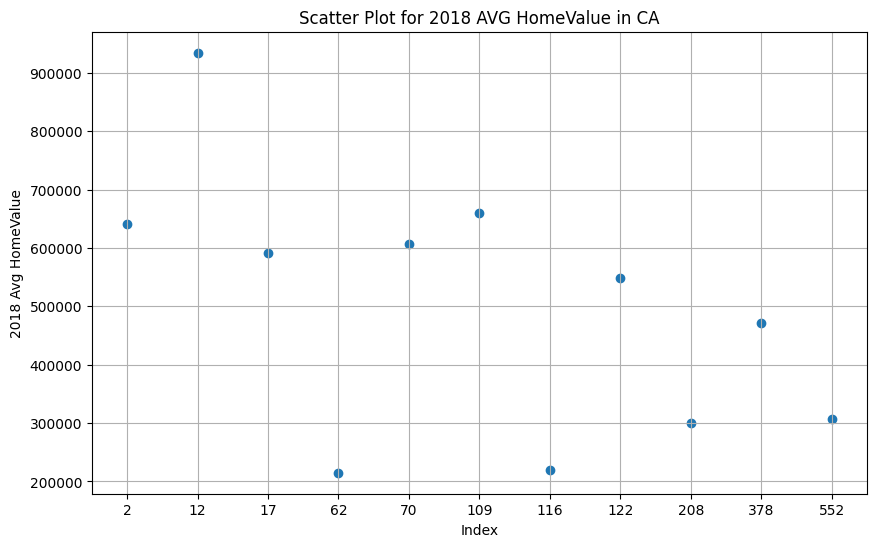


Statistics for Home Value in 2024:
count        11.0
mean     499701.0
std      222285.0
min      214922.0
25%      303773.0
50%      548919.0
75%      624460.0
max      934444.0
Name: 2018_Avg_HomeValue, dtype: float64 2


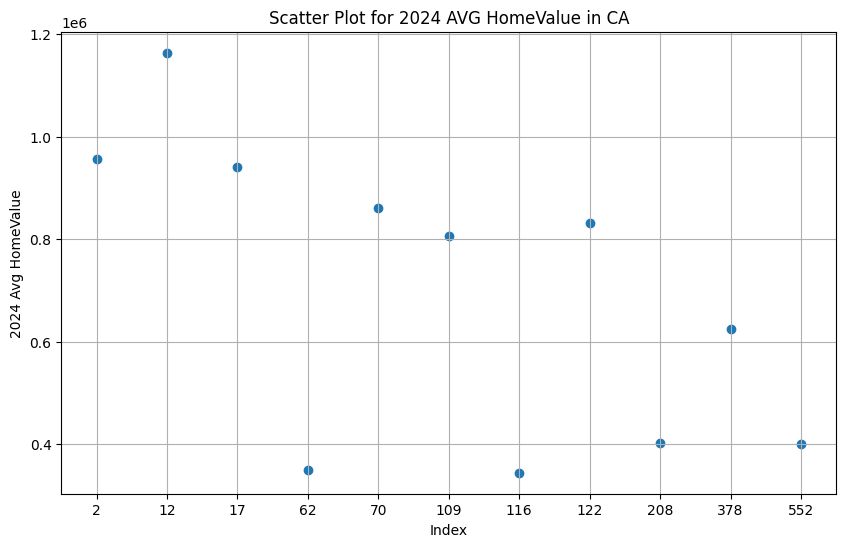


Statistics for Home Value in 2024:
count         11.0
mean      698309.0
std       287895.0
min       343898.0
25%       400403.0
50%       806831.0
75%       901145.0
max      1164165.0
Name: 2024_Avg_HomeValue, dtype: float64 2


In [118]:
#Displaying Data through graph for CA
#Decided to round everything because I liked the cleanliess of it all

#extract all information for CA
CA_df = df.loc[df['State'] == 'CA']
print(round(CA_df.head()), 2)


#Graph CA average home value cost for 2018
plt.figure(figsize=(10, 6))
plt.scatter(CA_df.index, CA_df['2018_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2018 AVG HomeValue in CA')
plt.xlabel('Index')
plt.ylabel('2018 Avg HomeValue')
plt.grid(True)
plt.show()

#describe the 2018 average home cost
print('\nStatistics for Home Value in 2024:')
print(round(CA_df['2018_Avg_HomeValue'].describe()), 2)


#Graph CA average home value cost for 2024
plt.figure(figsize=(10, 6))
plt.scatter(CA_df.index, CA_df['2024_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2024 AVG HomeValue in CA')
plt.xlabel('Index')
plt.ylabel('2024 Avg HomeValue')
plt.grid(True)
plt.show()

print('\nStatistics for Home Value in 2024:')
print(round(CA_df['2024_Avg_HomeValue'].describe()), 2)

In [119]:
#graphing the monthly california
#years = CA_df.index.year.unique()
#colors = sns.color_palette('husl', n_colors=len(years))
#cmap = dict(zip(years, colors))



     RegionID  SizeRank            Location State  2018-02-HomeValue  \
4      394514         4          Dallas, TX    TX           241533.0   
5      394692         5         Houston, TX    TX           208652.0   
66     394843        67         McAllen, TX    TX           105349.0   
126    394502       129  Corpus Christi, TX    TX           166118.0   
127    394421       130     Brownsville, TX    TX           119750.0   

     2018-02-DaysPending  2018-02-CutRaw  2018-03-HomeValue  \
4                   46.0          8562.0           243401.0   
5                   51.0         10000.0           209394.0   
66                  87.0          5000.0           106011.0   
126                 77.0          5900.0           166856.0   
127                 83.0          5400.0           119755.0   

     2018-03-DaysPending  2018-03-CutRaw  ...  2024-05-HomeValue  \
4                   42.0          9900.0  ...           381104.0   
5                   45.0         10000.0  ...       

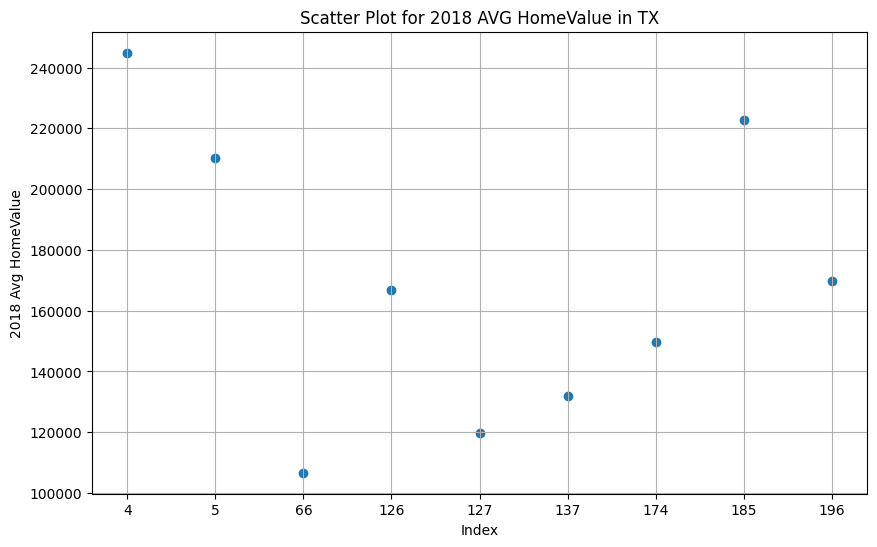


Statistics for Home Value in 2018:
count         9.0
mean     169178.0
std       47957.0
min      106658.0
25%      131888.0
50%      166906.0
75%      210290.0
max      244866.0
Name: 2018_Avg_HomeValue, dtype: float64 2


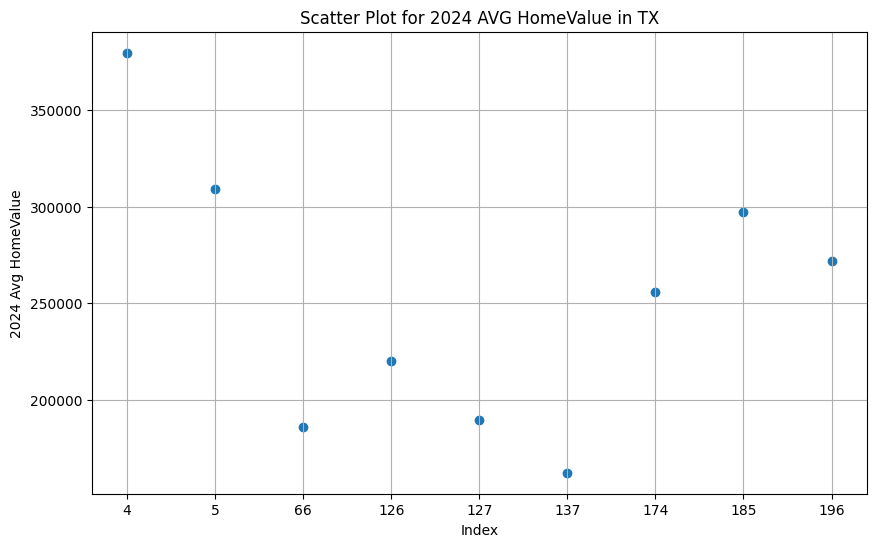


Statistics for Home Value in 2024:
count         9.0
mean     252397.0
std       70184.0
min      162213.0
25%      189515.0
50%      256041.0
75%      297098.0
max      379827.0
Name: 2024_Avg_HomeValue, dtype: float64 2


In [120]:
#extract all information from TX
TX_df = df.loc[df['State']== 'TX']
print(round(TX_df.head()), 2)

#Graph TX average home value cost for 2018
plt.figure(figsize=(10, 6))
plt.scatter(TX_df.index, TX_df['2018_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2018 AVG HomeValue in TX')
plt.xlabel('Index')
plt.ylabel('2018 Avg HomeValue')
plt.grid(True)
plt.show()

print('\nStatistics for Home Value in 2018:')
print(round(TX_df['2018_Avg_HomeValue'].describe()), 2)


#Graph TX average home value cost for 2018
plt.figure(figsize=(10, 6))
plt.scatter(TX_df.index, TX_df['2024_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2024 AVG HomeValue in TX')
plt.xlabel('Index')
plt.ylabel('2024 Avg HomeValue')
plt.grid(True)
plt.show()

print('\nStatistics for Home Value in 2024:')
print(round(TX_df['2024_Avg_HomeValue'].describe()), 2)


#Extracting NaN from TX
#TX_df.dropna(inplace=True)

In [121]:


#Unnecessary ANALYSIS

#We see a steady increase for both properties. It does seem like there is more purchasing power in California both in 2018 and 2024.
#This is becasue there's more people in california and there seems to be more money moving through california.

#While in TX shows that there propbably half that sold througout TX if we look at the Index in the graph. I also notice that the Mean goes from
#169K to 252K which is a steady increase over the years but also shows why a lot of people have been moving to TX becasue the Mean cost in CA goes from
#499K to 698k. This data would indicate that purchasing a home is easier in Texas due to the cost of living but homes in CA are worth more due to location/Cost
#living.

REDO -
I was attempting to decide who I'm going to restart this Data wrangling captstone
I decided to start over but keep where I started above. Following your lead so I can see where I started
and this way we don't get to confuse.
This is the start over in the Analysis of US housing market and reanalyzing/reorganizing the data

In [122]:
#Pull the data.
df = pd.read_csv('USRealEstateTrends.csv')
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [123]:
#Using pd.melt() to organize the data. EX. pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)
df_melt=pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName',], var_name='Year_Month_Parameters', value_name='Values')
df_melt.head()


,RegionID,SizeRank,RegionName,StateName,Year_Month_Parameters,Values
0,102001,0,United States,NaN,2018-02-HomeValue,225746.614318
1,394913,1,"New York, NY",NY,2018-02-HomeValue,468313.430126
2,753899,2,"Los Angeles, CA",CA,2018-02-HomeValue,629019.165765
3,394463,3,"Chicago, IL",IL,2018-02-HomeValue,229741.266973
4,394514,4,"Dallas, TX",TX,2018-02-HomeValue,241533.231800


In [124]:
#reorganizing the Dates from parameters by separating the dates in the parameters
df_melt[['Year', 'Month_Parameters']] = df_melt['Year_Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop('Year_Month_Parameters', axis=1, inplace=True)
df_melt.head()

,RegionID,SizeRank,RegionName,StateName,Values,Year,Month_Parameters
0,102001,0,United States,NaN,225746.614318,2018,02-HomeValue
1,394913,1,"New York, NY",NY,468313.430126,2018,02-HomeValue
2,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02-HomeValue
3,394463,3,"Chicago, IL",IL,229741.266973,2018,02-HomeValue
4,394514,4,"Dallas, TX",TX,241533.231800,2018,02-HomeValue


In [125]:
#Organize so melted DF shows a column of month
df_melt[['Month', 'Parameters']] = df_melt['Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop(columns = ['Month_Parameters'], inplace=True)
df_melt.head()

,RegionID,SizeRank,RegionName,StateName,Values,Year,Month,Parameters
0,102001,0,United States,NaN,225746.614318,2018,02,HomeValue
1,394913,1,"New York, NY",NY,468313.430126,2018,02,HomeValue
2,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02,HomeValue
3,394463,3,"Chicago, IL",IL,229741.266973,2018,02,HomeValue
4,394514,4,"Dallas, TX",TX,241533.231800,2018,02,HomeValue


In [126]:
# Privot table - I'm lost when it comes to the importance of pivot tables so I decieded to do the research and correct/Understand it.
# data analysis tool that allows you to take columns of raw data from a pandas DataFrame, summarize them, and then analyze the summary data to reveal its insights.
df_reorganized = df_melt.pivot_table(index=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'Year', 'Month'],
                                     columns='Parameters', values='Values').reset_index()
df_reorganized.head()

Parameters,RegionID,SizeRank,RegionName,StateName,Year,Month,CutRaw,DaysPending,HomeValue
0,394297,677,"Aberdeen, SD",SD,2018,02,NaN,NaN,157291.052407
1,394297,677,"Aberdeen, SD",SD,2018,03,NaN,NaN,157968.874602
2,394297,677,"Aberdeen, SD",SD,2018,04,NaN,NaN,158278.563805
3,394297,677,"Aberdeen, SD",SD,2018,05,NaN,NaN,158611.924094
4,394297,677,"Aberdeen, SD",SD,2018,06,NaN,NaN,158796.038994


In [127]:
#filter the df for the specific RegionID
filtered_df = df[df['RegionID'] == 394297]

#columns with any NA
columns_with_na = filtered_df.columns[filtered_df.isna().any()].tolist()

#print
print(columns_with_na)

['2018-02-DaysPending', '2018-02-CutRaw', '2018-03-DaysPending', '2018-03-CutRaw', '2018-04-DaysPending', '2018-04-CutRaw', '2018-05-DaysPending', '2018-05-CutRaw', '2018-06-DaysPending', '2018-06-CutRaw', '2018-07-DaysPending', '2018-07-CutRaw', '2018-08-DaysPending', '2018-08-CutRaw', '2018-09-DaysPending', '2018-09-CutRaw', '2018-10-DaysPending', '2018-10-CutRaw', '2018-11-DaysPending', '2018-11-CutRaw', '2018-12-DaysPending', '2018-12-CutRaw', '2019-01-DaysPending', '2019-01-CutRaw', '2019-02-DaysPending', '2019-02-CutRaw', '2019-03-DaysPending', '2019-03-CutRaw', '2019-04-DaysPending', '2019-04-CutRaw', '2019-05-DaysPending', '2019-05-CutRaw', '2019-06-DaysPending', '2019-06-CutRaw', '2019-07-DaysPending', '2019-07-CutRaw', '2019-08-DaysPending', '2019-08-CutRaw', '2019-09-DaysPending', '2019-09-CutRaw', '2019-10-DaysPending', '2019-10-CutRaw', '2019-11-DaysPending', '2019-11-CutRaw', '2019-12-DaysPending', '2019-12-CutRaw', '2020-01-DaysPending', '2020-01-CutRaw', '2020-02-DaysPe

In [128]:
df_reorganized[df_reorganized['RegionID']==394297]

Parameters,RegionID,SizeRank,RegionName,StateName,Year,Month,CutRaw,DaysPending,HomeValue
0,394297,677,"Aberdeen, SD",SD,2018,02,NaN,NaN,157291.052407
1,394297,677,"Aberdeen, SD",SD,2018,03,NaN,NaN,157968.874602
2,394297,677,"Aberdeen, SD",SD,2018,04,NaN,NaN,158278.563805
3,394297,677,"Aberdeen, SD",SD,2018,05,NaN,NaN,158611.924094
4,394297,677,"Aberdeen, SD",SD,2018,06,NaN,NaN,158796.038994
...,...,...,...,...,...,...,...,...,...
71,394297,677,"Aberdeen, SD",SD,2024,01,NaN,NaN,218243.731231
72,394297,677,"Aberdeen, SD",SD,2024,02,5300.0,NaN,218884.325033
73,394297,677,"Aberdeen, SD",SD,2024,03,5875.0,NaN,220114.195026
74,394297,677,"Aberdeen, SD",SD,2024,04,10000.0,45.0,221489.867707


In [131]:
#per the suggestion, I combined year and month. However, I'm attempt to figure out why
df_reorganized['Year_Month'] = df_reorganized['Year'] + '-' + df_reorganized['Month']
df_reorganized.set_index('Year_Month', inplace=True)
df_reorganized.head(10)

Parameters,RegionID,SizeRank,RegionName,StateName,Year,Month,CutRaw,DaysPending,HomeValue
Year_Month,,,,,,,,,
2018-02,394297,677,"Aberdeen, SD",SD,2018,02,NaN,NaN,157291.052407
2018-03,394297,677,"Aberdeen, SD",SD,2018,03,NaN,NaN,157968.874602
2018-04,394297,677,"Aberdeen, SD",SD,2018,04,NaN,NaN,158278.563805
2018-05,394297,677,"Aberdeen, SD",SD,2018,05,NaN,NaN,158611.924094
2018-06,394297,677,"Aberdeen, SD",SD,2018,06,NaN,NaN,158796.038994
2018-07,394297,677,"Aberdeen, SD",SD,2018,07,NaN,NaN,159428.154876
2018-08,394297,677,"Aberdeen, SD",SD,2018,08,NaN,NaN,159753.146624
2018-09,394297,677,"Aberdeen, SD",SD,2018,09,NaN,NaN,159918.296831
2018-10,394297,677,"Aberdeen, SD",SD,2018,10,NaN,NaN,159688.878684


In [130]:
#inspecting Stats of information
df_reorganized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67922 entries, 2018-02 to 2024-05
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RegionID     67922 non-null  int64  
 1   SizeRank     67922 non-null  int64  
 2   RegionName   67922 non-null  object 
 3   StateName    67922 non-null  object 
 4   Year         67922 non-null  object 
 5   Month        67922 non-null  object 
 6   CutRaw       29852 non-null  float64
 7   DaysPending  37155 non-null  float64
 8   HomeValue    67911 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 5.2+ MB


In [134]:
# this one I wasn't sure as to why it needed to be done. Why do .copy() because I haven't
#seen this syntax before.

#definiton: copy() method returns a copy of the specified list
new_df = df_reorganized.copy()

#gather null values from column 'days pending' because day pending on the market is import
#to me

new_df['NullValues_DaysPending'] = new_df['DaysPending'].isnull().astype(int)
null_values_by_date=new_df.groupby(new_df.index)['NullValues_DaysPending'].sum().reset_index()
null_values_by_date


,Year_Month,NullValues_DaysPending
0,2018-02,526
1,2018-03,524
2,2018-04,520
3,2018-05,520
4,2018-06,519
...,...,...
71,2024-01,271
72,2024-02,237
73,2024-03,205
74,2024-04,177


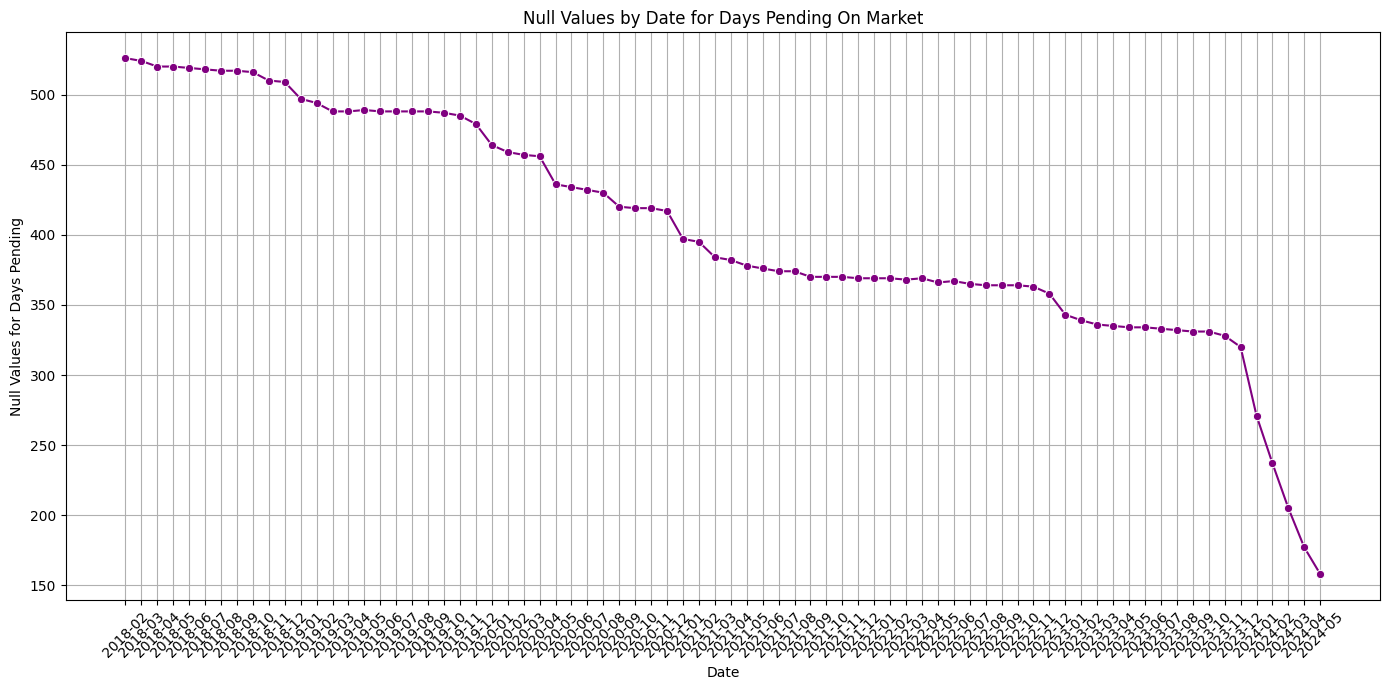

In [135]:
#plotting.  : Question: how do you decide figure size in plotting?
plt.figure(figsize=(14, 7))
sns.lineplot(data=null_values_by_date, x='Year_Month', y='NullValues_DaysPending', marker='o', color='purple')
plt.title('Null Values by Date for Days Pending On Market')
plt.xlabel('Date')
plt.ylabel('Null Values for Days Pending')
plt.grid(True)
#how do you decide this?
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [137]:
#I decided to add this to mine because I enjoyed how it looked in your coding but also
#it gave me a good time to learn the library's and see how we use  organizing data in graphs

import plotly.express as px

#Simple evaluation of the library
fig = px.line(null_values_by_date, x='Year_Month', y='NullValues_DaysPending', title='Null Values by Date for Days Pending On Market')
fig.show()

In [141]:
fig = px.scatter(
    df_reorganized,
    x=df_reorganized.index,
    y='DaysPending',
    hover_name='StateName',
    hover_data={'RegionName': True, 'DaysPending': True},
    title='Days Pending on the Market Over Time',
    labels={'x': 'Date', 'y': 'DaysPending'}
)

fig.show()